In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('data/Sample_Data.csv')
df.head()

,Values,Timestamp
0,100,26-06-2024 06:17:55
1,100,26-06-2024 06:18:11
2,100,26-06-2024 06:18:28
3,100,26-06-2024 06:18:45
4,100,26-06-2024 06:19:00


In [34]:
df.shape

(21919, 2)

In [35]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

/tmp/ipykernel_36997/3991263233.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Timestamp"] = pd.to_datetime(df["Timestamp"])


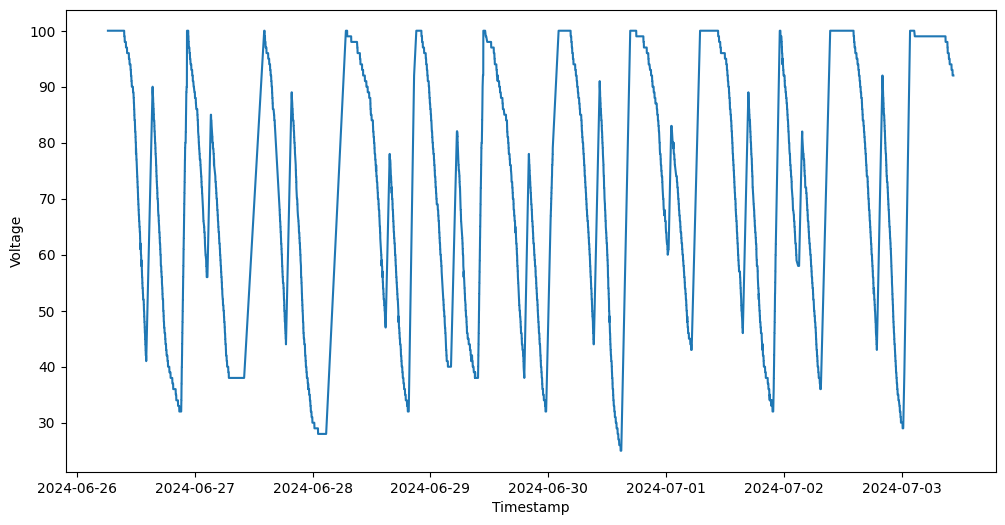

In [36]:
plt.figure(figsize=(12,6))
plt.plot(df["Timestamp"], df["Values"])
plt.xlabel("Timestamp")
plt.ylabel("Voltage")
plt.show()

In [37]:
df["MA_5"] = df["Values"].rolling(5).mean()
df["MA_1000"] = df["Values"].rolling(1000).mean()
df["MA_5000"] = df["Values"].rolling(5000).mean()
df

,Values,Timestamp,MA_5,MA_1000,MA_5000
0,100,2024-06-26 06:17:55,NaN,NaN,NaN
1,100,2024-06-26 06:18:11,NaN,NaN,NaN
2,100,2024-06-26 06:18:28,NaN,NaN,NaN
3,100,2024-06-26 06:18:45,NaN,NaN,NaN
4,100,2024-06-26 06:19:00,100.0,NaN,NaN
...,...,...,...,...,...
21914,92,2024-07-03 10:29:38,92.0,64.473,64.9504
21915,92,2024-07-03 10:29:54,92.0,64.487,64.9548
21916,92,2024-07-03 10:30:11,92.0,64.501,64.9592
21917,92,2024-07-03 10:30:26,92.0,64.515,64.9636


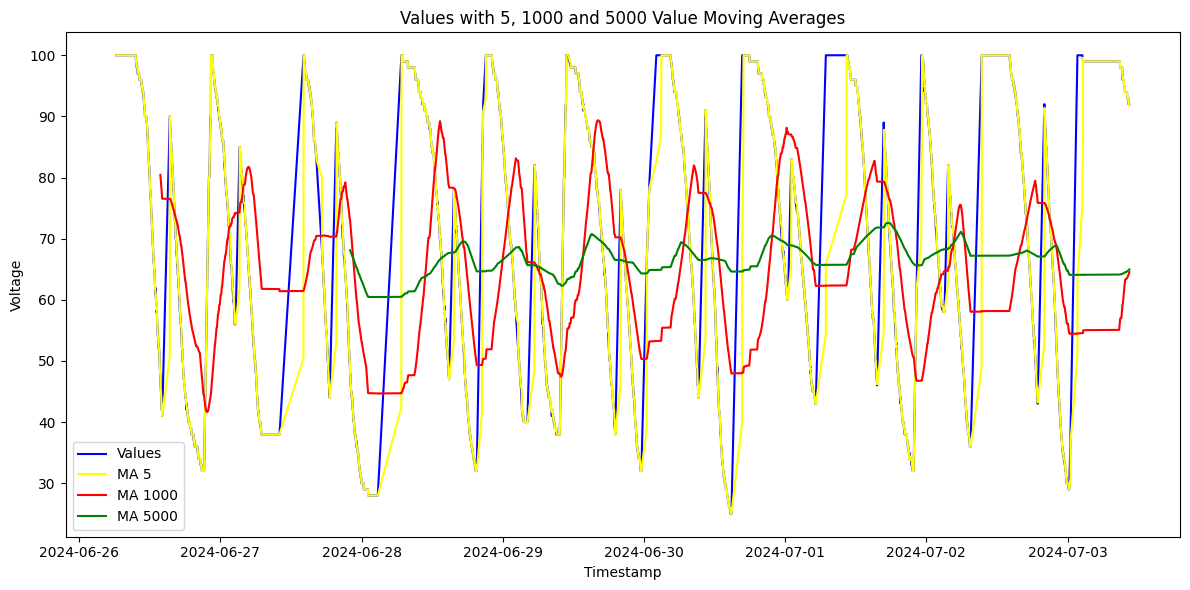

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(df["Timestamp"], df["Values"], color='blue')
plt.plot(df["Timestamp"], df["MA_5"], color='yellow')
plt.plot(df["Timestamp"], df["MA_1000"], color='red')
plt.plot(df["Timestamp"], df["MA_5000"], color='green')
plt.xlabel("Timestamp")
plt.ylabel("Voltage")
plt.title("Values with 5, 1000 and 5000 Value Moving Averages")
plt.legend(["Values", "MA 5", "MA 1000", "MA 5000"])
plt.tight_layout()
plt.show()

In [39]:
from scipy.signal import find_peaks

In [40]:
peak, _ = find_peaks(df["Values"])
low, _ = find_peaks(-df["Values"])

peak_df = df.iloc[peak][["Timestamp", "Values"]]
low_df = df.iloc[low][["Timestamp", "Values"]]

peak_df

,Timestamp,Values
122,2024-06-26 09:57:56,98
361,2024-06-26 10:58:57,93
557,2024-06-26 11:49:49,83
603,2024-06-26 12:01:22,79
798,2024-06-26 12:55:48,62
...,...,...
21422,2024-07-02 23:18:22,35
21484,2024-07-02 23:43:44,32
21505,2024-07-02 23:49:13,31
21543,2024-07-03 00:09:26,30


In [41]:
low_df

,Timestamp,Values
120,2024-06-26 09:57:38,97
360,2024-06-26 10:58:56,92
556,2024-06-26 11:49:32,82
602,2024-06-26 12:01:06,78
795,2024-06-26 12:55:00,61
...,...,...
21421,2024-07-02 23:18:04,34
21482,2024-07-02 23:43:27,31
21504,2024-07-02 23:48:57,30
21542,2024-07-03 00:09:09,29


In [42]:
below_df = df.loc[df['Values'] < 100, ['Timestamp', 'Values']]
below_df

,Timestamp,Values
36,2024-06-26 09:36:30,99
37,2024-06-26 09:36:47,99
38,2024-06-26 09:37:04,99
39,2024-06-26 09:37:20,99
40,2024-06-26 09:37:35,99
...,...,...
21914,2024-07-03 10:29:38,92
21915,2024-07-03 10:29:54,92
21916,2024-07-03 10:30:11,92
21917,2024-07-03 10:30:26,92


In [43]:
slope = df['Values'].diff()
slope_change = slope.diff()
down_acc = df[(slope < 0) & (slope_change < 0)][['Timestamp']]

In [44]:
down_acc

,Timestamp
36,2024-06-26 09:36:30
60,2024-06-26 09:42:33
120,2024-06-26 09:57:38
125,2024-06-26 09:58:47
174,2024-06-26 10:11:06
...,...
21687,2024-07-03 09:21:12
21732,2024-07-03 09:34:56
21769,2024-07-03 09:44:50
21831,2024-07-03 10:07:38
